# Insights from Seattle Airbnb Dataset
In this notebook, we are going to get some insights from the dataset provided by Seattle Airbnb using the CRISP-DM process (Cross Industry Standard Process for Data Mining). The process is divided into the following steps:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Modeling
5. Evaluation of the results
6. Deployment

The dataset can be found on: https://www.kaggle.com/airbnb/seattle/data

# 1. Business Understanding

Questions we are interested in:
1. What are the most and the least expensive listings in Seattle?
2. What are the most and least expensive places in Seattle?
3. How do the prices of the listings differ across the year?
4. Can we predict the price of a listing in Seattle? What are the factors that highly affect the pricing by Airbnb Seattle?

# 2. Data Understanding


## 2.1 Loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df_calendar = pd.read_csv("Data_Airbnb/calendar.csv")
df_reviews = pd.read_csv("Data_Airbnb/reviews.csv")
df_listings = pd.read_csv("Data_Airbnb/listings.csv")

## 2.2 Exploratory Data Analysis

### 2.2.1 The listings dataframe:

In [3]:
df_listings.shape

(3818, 92)

In [4]:
pd.set_option('display.max_columns', None)  # to display all the columns
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [5]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [6]:
# getting the columns in df_listings with more than 50% NaNs
set(df_listings.columns[df_listings.isnull().mean() >= 0.5])

{'license', 'monthly_price', 'security_deposit', 'square_feet'}

In [7]:
# disribution of the neighbourhood_cleansed column
df_listings['neighbourhood_cleansed'].value_counts()

Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
Pinehurst              4
South Beacon Hill      4
South Park             3
Roxhill                2
Name: neighbourhood_cleansed, Length: 87, dtype: int64

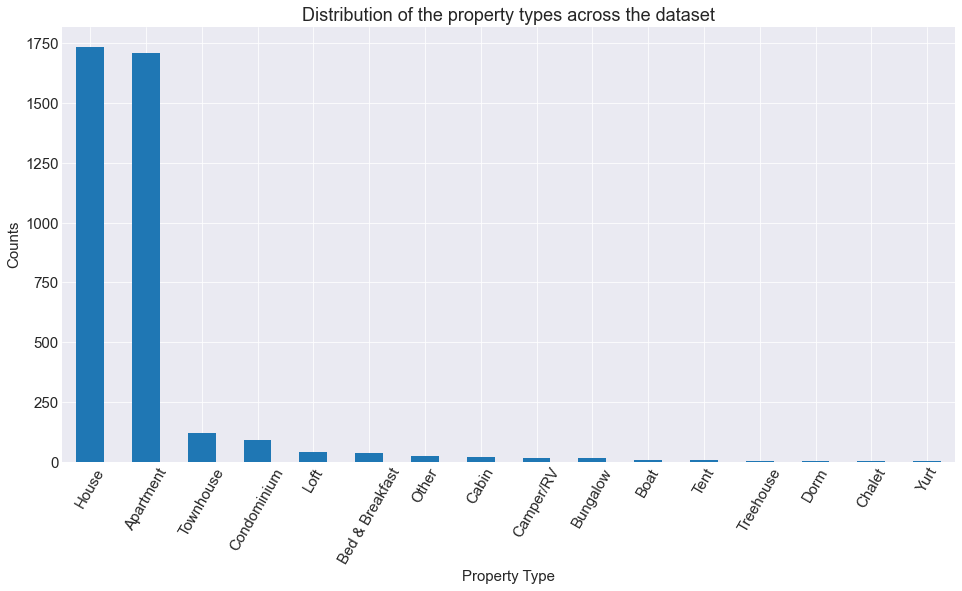

In [8]:
# plotting the distribution of the property types
import matplotlib
from matplotlib import style
style.use('seaborn-darkgrid')
plt.rc('font', size=15)  
#matplotlib.rc('xtick', labelsize=15) 
#matplotlib.rc('ytick', labelsize=15)

df_listings['property_type'].value_counts().plot(kind="bar", figsize=(16,8))
plt.xlabel("Property Type")
plt.ylabel("Counts")
plt.title("Distribution of the property types across the dataset")
plt.xticks(rotation=60);

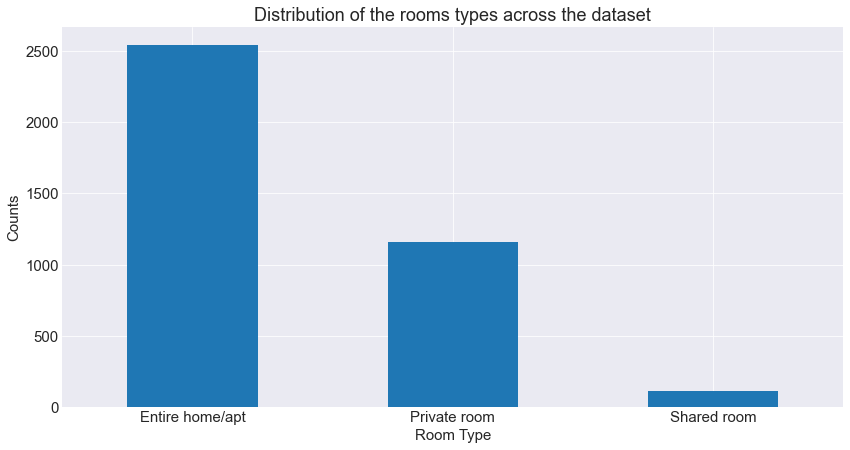

In [9]:
# Plotting the distribution of the room types
df_listings['room_type'].value_counts().plot(kind="bar", figsize=(14,7))
plt.ylabel("Counts")
plt.xlabel("Room Type")
plt.title("Distribution of the rooms types across the dataset")
plt.xticks(rotation=0);

In [10]:
#cleaning the price column
df_listings['price'] = pd.to_numeric(df_listings['price'].apply(lambda x : str(x).replace('$','').replace(",",'')))

In [11]:
df_listings['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

### Conclusion: The prices in the dataset varies between 20\\$ and 1000\\$ with 75% of the prices do not exceed 150\\$

# Q1. What are the most and the least expensive listings and places in Seatle?
## Finding the average prices per property type:

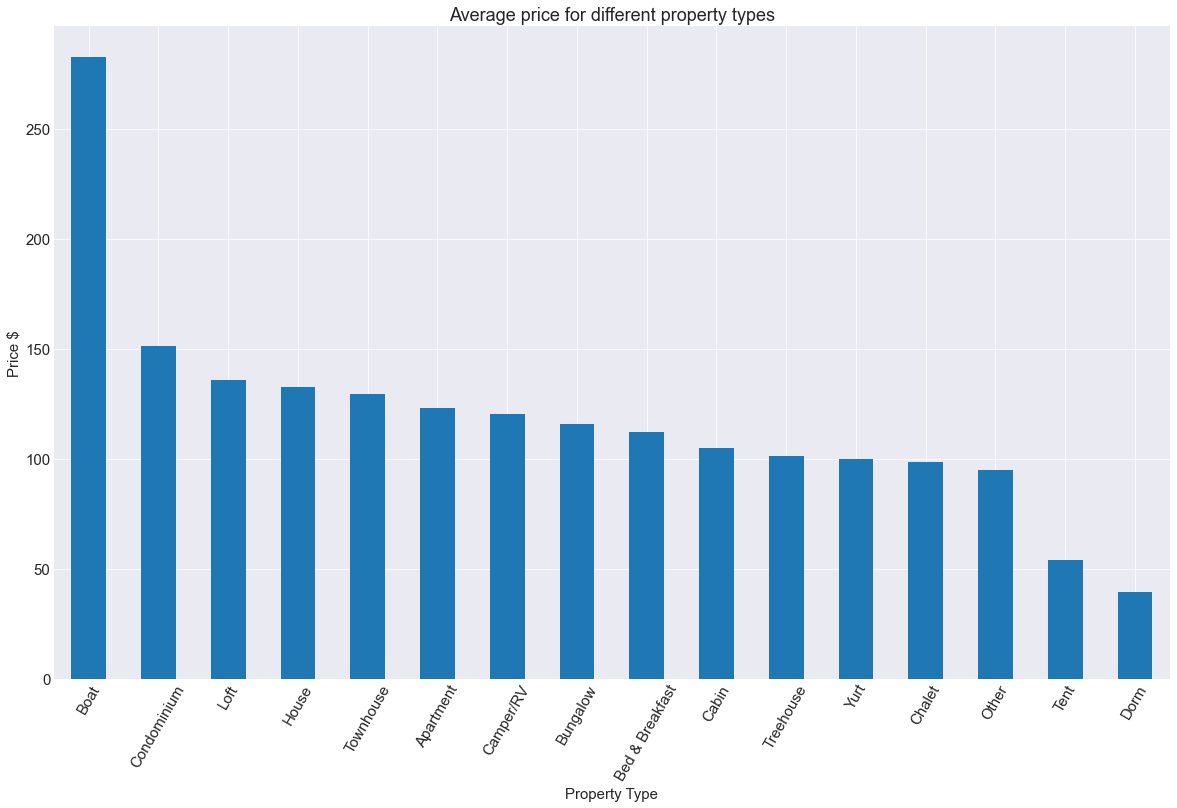

In [12]:
fig = plt.figure(figsize=(20,12));
df_listings.groupby(['property_type'])['price'].mean().sort_values(ascending=False).plot(kind='bar');
plt.title('Average price for different property types');
plt.xlabel('Property Type');
plt.ylabel('Price $');
plt.xticks(rotation=60);

In [13]:
fig.savefig('average_price_property_types.png')

### From the above figure, we find that the most expensive properties to rent in Seatle are Boats with average price of aproximatley 280\\$, where Dorms has the lowest average price of approximately 40\\$

# Q2. What is the average listing price across the neighbourhoods in Seattle?
## Top 5 most expensive neighbourhoods

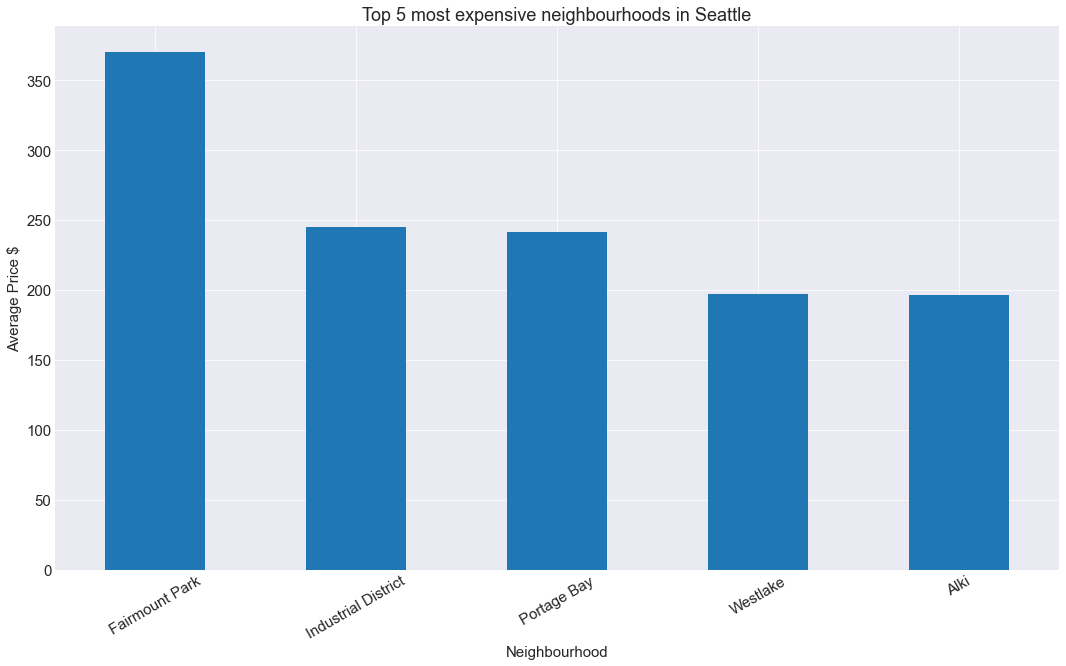

In [14]:
fig = plt.figure(figsize=(18,10));
df_listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:5].plot(kind="bar")
plt.title("Top 5 most expensive neighbourhoods in Seattle")
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price $');
plt.xticks(rotation=30);

In [15]:
fig.savefig('Top5_price_neighbourhood.png')

## The 5 least expensive neighbourhoods

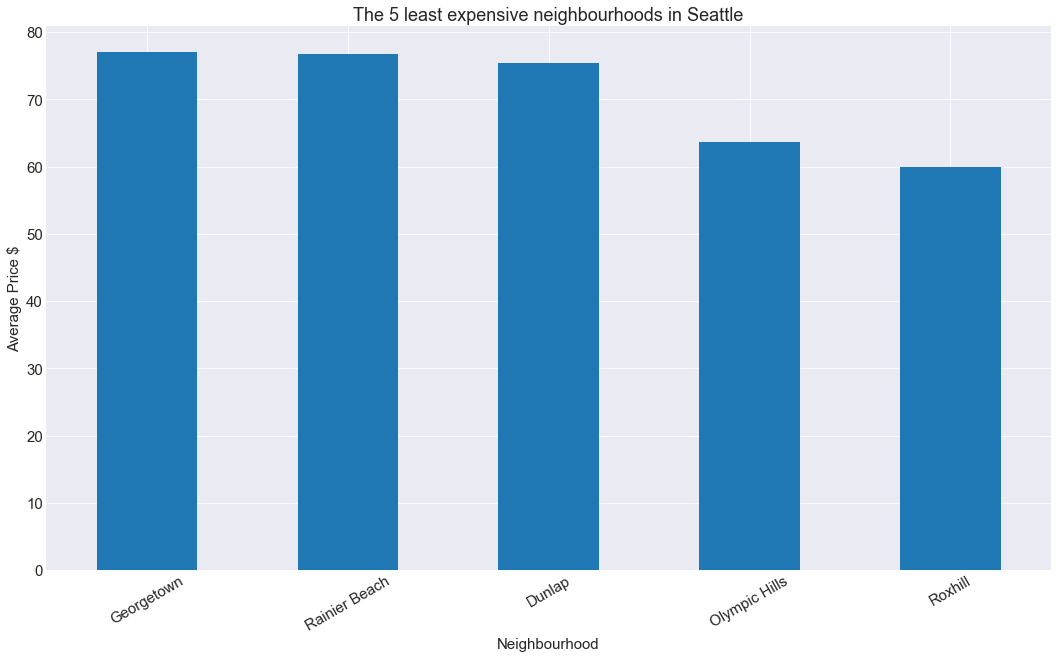

In [16]:
fig = plt.figure(figsize=(18,10));
df_listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[-5:].plot(kind="bar")
plt.title("The 5 least expensive neighbourhoods in Seattle")
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price $');
plt.xticks(rotation=30);

### From the above figure, we find that the most expensive neighbourhoods in Seatle are: (Fairmount Park, Industrial District and Portage Bay) , where (Roxhill, Olympic Hills and Dunlap) have the lowest average rent prices in Seatle. 

In [17]:
fig.savefig('Lowest5_price_neighbourhood.png')

### 2.2.2 the calendar dataframe

In [18]:
df_calendar.shape

(1393570, 4)

In [19]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [20]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [21]:
df_calendar.isna().mean()

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

# Q3. How do the prices differ across the year?

In [22]:
# drop the rows with NaNs in 'price' column
df_calendar.dropna(subset=['price'], inplace=True)

In [23]:
df_calendar['price'] = pd.to_numeric(df_calendar['price'].apply(lambda x: str(x).replace('$','').replace(",",'')))

In [24]:
df_calendar['date'] = pd.to_datetime(df_calendar["date"])

In [25]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


In [26]:
# add month and year column to the calender dataset
df_calendar['month'] = df_calendar.date.dt.month
df_calendar['year'] = df_calendar.date.dt.year

In [27]:
df_calendar.head()

,listing_id,date,available,price,month,year
0,241032,2016-01-04,t,85.0,1,2016
1,241032,2016-01-05,t,85.0,1,2016
9,241032,2016-01-13,t,85.0,1,2016
10,241032,2016-01-14,t,85.0,1,2016
14,241032,2016-01-18,t,85.0,1,2016


In [28]:
average_price_per_month = df_calendar.groupby(['month','available']).mean()['price']

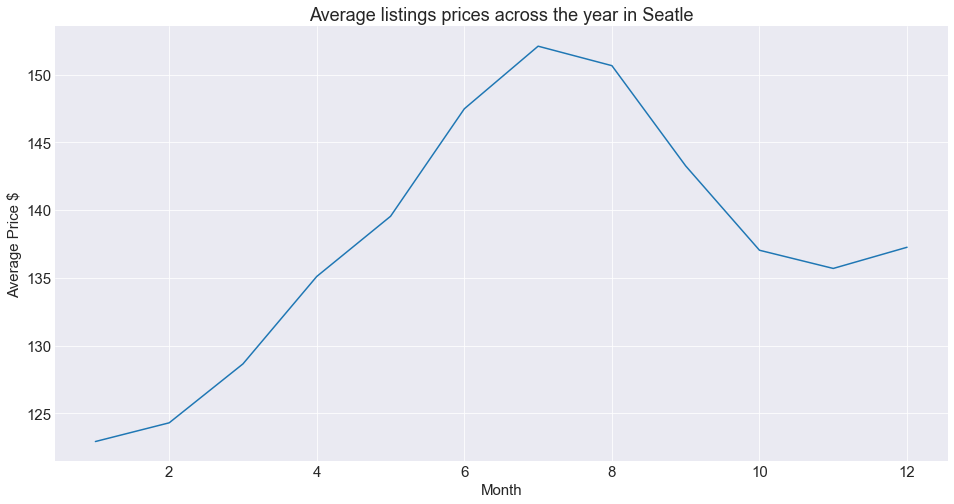

In [29]:
fig = plt.figure(figsize=(16,8))
plt.plot(range(1,13), (average_price_per_month))
plt.title("Average listings prices across the year in Seatle");

plt.xlabel('Month');
plt.ylabel('Average Price $');

In [30]:
fig.savefig('average_price_across_the_year.png')

### Conclusion: The highest prices can be found in the summer months (June- July- August), and the lowest average price in winter especially in January and February

# 3. Data Preparation

In [31]:
col_to_drop = set(df_listings.columns[df_listings.isna().mean()>0.5])
col_to_drop

{'license', 'monthly_price', 'security_deposit', 'square_feet'}

In [32]:
# Dropping columns with more than 50% Nan's
df_listings.drop(col_to_drop, axis=1, inplace= True)

Handling Categorical Columns

In [33]:
categorical_col = df_listings.select_dtypes(include=['object']).columns
categorical_col

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'weekly_price',
       'cleaning_fee', 'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'requi

In [34]:
categorical_col_to_drop = ['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_acceptance_rate',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications',
       'street', 'neighbourhood','neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact', 'amenities', 'weekly_price',
                          'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'requires_license', 'jurisdiction_names']

In [35]:
df_listings.drop(categorical_col_to_drop, axis=1, inplace= True)

In [36]:
categorical_col = df_listings.select_dtypes(include=['object']).columns
categorical_col

Index(['host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type',
       'cleaning_fee', 'extra_people', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

In [37]:
df_listings[categorical_col].head()

,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bed_type,cleaning_fee,extra_people,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,within a few hours,96%,f,t,t,West Queen Anne,Apartment,Entire home/apt,Real Bed,NaN,$5.00,f,moderate,f,f
1,within an hour,98%,t,t,t,West Queen Anne,Apartment,Entire home/apt,Real Bed,$40.00,$0.00,f,strict,t,t
2,within a few hours,67%,f,t,t,West Queen Anne,House,Entire home/apt,Real Bed,$300.00,$25.00,f,strict,f,f
3,NaN,NaN,f,t,t,West Queen Anne,Apartment,Entire home/apt,Real Bed,NaN,$0.00,f,flexible,f,f
4,within an hour,100%,f,t,t,West Queen Anne,House,Entire home/apt,Real Bed,$125.00,$15.00,f,strict,f,f


In [38]:
col_to_fix = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
             'require_guest_profile_picture','require_guest_phone_verification']
for col in col_to_fix:
    df_listings[col] = df_listings[col].apply(lambda x: 1 if x =='t' else 0)
    

In [39]:
df_listings[col_to_fix].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,0,1,1,0,0,0
1,1,1,1,0,1,1
2,0,1,1,0,0,0
3,0,1,1,0,0,0
4,0,1,1,0,0,0


In [40]:
df_listings["cleaning_fee"]= pd.to_numeric(df_listings["cleaning_fee"].apply(lambda x : str(x).replace('$','').replace(",",'')),
                                          errors="coerce")

In [41]:
df_listings["extra_people"]= pd.to_numeric(df_listings["extra_people"].apply(lambda x : str(x).replace('$','').replace(",",'')),
                                          errors="coerce")

In [42]:
df_listings[['cleaning_fee','extra_people']].head()

,cleaning_fee,extra_people
0,NaN,5.0
1,40.0,0.0
2,300.0,25.0
3,NaN,0.0
4,125.0,15.0


In [43]:
df_listings["host_response_rate"] =  pd.to_numeric(df_listings["host_response_rate" ].apply(lambda x : float(str(x).replace('%',''))/100), 
                                                                          errors="coerce")

In [44]:
df_listings[categorical_col].head()

,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bed_type,cleaning_fee,extra_people,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,within a few hours,0.96,0,1,1,West Queen Anne,Apartment,Entire home/apt,Real Bed,NaN,5.0,0,moderate,0,0
1,within an hour,0.98,1,1,1,West Queen Anne,Apartment,Entire home/apt,Real Bed,40.0,0.0,0,strict,1,1
2,within a few hours,0.67,0,1,1,West Queen Anne,House,Entire home/apt,Real Bed,300.0,25.0,0,strict,0,0
3,NaN,NaN,0,1,1,West Queen Anne,Apartment,Entire home/apt,Real Bed,NaN,0.0,0,flexible,0,0
4,within an hour,1.00,0,1,1,West Queen Anne,House,Entire home/apt,Real Bed,125.0,15.0,0,strict,0,0


In [45]:
categorical_col = list(df_listings.select_dtypes(include=['object']).columns)
categorical_col

['host_response_time',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy']

In [46]:
df_listings = pd.concat([df_listings, pd.get_dummies(df_listings[categorical_col], prefix=categorical_col, prefix_sep='_', drop_first=False, dummy_na=False)], axis=1)


In [47]:
df_listings.drop(categorical_col, axis=1, inplace=True)

In [48]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 156 entries, id to cancellation_policy_strict
dtypes: float64(19), int64(19), uint8(118)
memory usage: 1.5 MB


In [49]:
#Checking the number of Nans
df_listings.isna().mean().sort_values(ascending=False)

cleaning_fee                                        0.269775
review_scores_accuracy                              0.172342
review_scores_checkin                               0.172342
review_scores_value                                 0.171818
review_scores_location                              0.171556
                                                      ...   
neighbourhood_cleansed_Crown Hill                   0.000000
neighbourhood_cleansed_Columbia City                0.000000
neighbourhood_cleansed_Central Business District    0.000000
neighbourhood_cleansed_Cedar Park                   0.000000
cancellation_policy_strict                          0.000000
Length: 156, dtype: float64

In [50]:
df_listings.dropna(axis=0,inplace=True)

In [51]:
df_listings.shape

(2179, 156)

In [52]:
col_names = list(df_listings.columns)
col_names

['id',
 'scrape_id',
 'host_id',
 'host_response_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count',
 'reviews_per_month',
 'host_response_time_a few days or more',
 'host_response_time_within a day',
 'host_response_time_within a few hours',
 'host_response_time_within an hour',
 'neighbourhood_cleansed_Adams',


In [53]:
# scale numerical values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_listings[col_names] = scaler.fit_transform(df_listings)

In [54]:
df_listings.head()

,id,scrape_id,host_id,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_cleansed_Adams,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Broadview,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Bryant,neighbourhood_cleansed_Cedar Park,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_Crown Hill,neighbourhood_cleansed_Dunlap,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_Fairmount Park,neighbourhood_cleansed_Fauntleroy,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Gatewood,neighbourhood_cleansed_Genesee,neighbourhood_cleansed_Georgetown,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Haller Lake,neighbourhood_cleansed_Harrison/Denny-Blaine,neighbourhood_cleansed_High Point,neighbourhood_cleansed_Highland Park,neighbourhood_cleansed_Holly Park,neighbourhood_cleansed_Industrial District,neighbourhood_cleansed_Interbay,neighbourhood_cleansed_International District,neighbourhood_cleansed_Laurelhurst,neighbourhood_cleansed_Lawton Park,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madison Park,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Maple Leaf,neighbourhood_cleansed_Matthews Beach,neighbourhood_cleansed_Meadowbrook,neighbourhood_cleansed_Mid-Beacon Hill,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Montlake,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beach/Blue Ridge,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North College Park,neighbourhood_cleansed_North Delridge,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Olympic Hills,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Pike-Market,neighbourhood_cleansed_Pinehurst,neighbourhood_cleansed_Pioneer Square,neighbourhood_cleansed_Portage Bay,neighbourhood_cleansed_Rainier Beach,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Riverview,neighbourhood_cleansed_Roosevelt,neighbourhood_cleansed_Roxhill,neighbourhood_cleansed_Seaview,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_South Beacon Hill,neighbourhood_cleansed_South Delridge,neighbourhood_cleansed_South Lake Union,neighbourhood_cleansed_South Park,neighbourhood_cleansed_Southeast Magnolia,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_Sunset Hill,neighbourhood_cleansed_University District,neighbourhood_cleansed_Victory Heights,neighbourhood_cleansed_View Ridge,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,

In [55]:
df_listings.select_dtypes(include=['float', 'int']).columns

Index(['id', 'scrape_id', 'host_id', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'latitude',
       ...
       'room_type_Private room', 'room_type_Shared room', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed', 'cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict'],
      dtype='object', length=156)

In [56]:
df_listings.drop(['id', 'scrape_id', 'host_id'], axis=1, inplace= True)

In [57]:
def str_to_num(df,column):
    df[column] = pd.to_numeric(df[column].apply(lambda x : str(x).replace('$','').replace(",",'')),errors='coerce')
    return df


In [58]:
df_listings.head()

,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_cleansed_Adams,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Broadview,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Bryant,neighbourhood_cleansed_Cedar Park,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_Crown Hill,neighbourhood_cleansed_Dunlap,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_Fairmount Park,neighbourhood_cleansed_Fauntleroy,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Gatewood,neighbourhood_cleansed_Genesee,neighbourhood_cleansed_Georgetown,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Haller Lake,neighbourhood_cleansed_Harrison/Denny-Blaine,neighbourhood_cleansed_High Point,neighbourhood_cleansed_Highland Park,neighbourhood_cleansed_Holly Park,neighbourhood_cleansed_Industrial District,neighbourhood_cleansed_Interbay,neighbourhood_cleansed_International District,neighbourhood_cleansed_Laurelhurst,neighbourhood_cleansed_Lawton Park,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madison Park,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Maple Leaf,neighbourhood_cleansed_Matthews Beach,neighbourhood_cleansed_Meadowbrook,neighbourhood_cleansed_Mid-Beacon Hill,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Montlake,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beach/Blue Ridge,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North College Park,neighbourhood_cleansed_North Delridge,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Olympic Hills,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Pike-Market,neighbourhood_cleansed_Pinehurst,neighbourhood_cleansed_Pioneer Square,neighbourhood_cleansed_Portage Bay,neighbourhood_cleansed_Rainier Beach,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Riverview,neighbourhood_cleansed_Roosevelt,neighbourhood_cleansed_Roxhill,neighbourhood_cleansed_Seaview,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_South Beacon Hill,neighbourhood_cleansed_South Delridge,neighbourhood_cleansed_South Lake Union,neighbourhood_cleansed_South Park,neighbourhood_cleansed_Southeast Magnolia,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_Sunset Hill,neighbourhood_cleansed_University District,neighbourhood_cleansed_Victory Heights,neighbourhood_cleansed_View Ridge,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/

## 4. Data Modelling

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


#create feature set and labels
X = df_listings.drop(['price'],axis=1)
y = df_listings['price']

#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
forest = RandomForestRegressor()

In [61]:
forest.fit(X_train,y_train)

RandomForestRegressor()

# 5. Evaluation of the results

In [62]:
y_pred = forest.predict(X_test)
mean_squared_error(y_pred, y_test)

0.0017221103129430807

In [63]:
import sklearn
print(sklearn.__version__)

0.24.1


In [64]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

feature_names = list(X.columns)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

In [65]:
forest_importances.sort_values(ascending=False).head(10)

bedrooms                                   0.335374
cleaning_fee                               0.098791
room_type_Entire home/apt                  0.081010
bathrooms                                  0.055401
latitude                                   0.026659
availability_365                           0.017762
accommodates                               0.013365
longitude                                  0.010761
neighbourhood_cleansed_Belltown            0.006663
neighbourhood_cleansed_South Lake Union    0.005982
dtype: float64

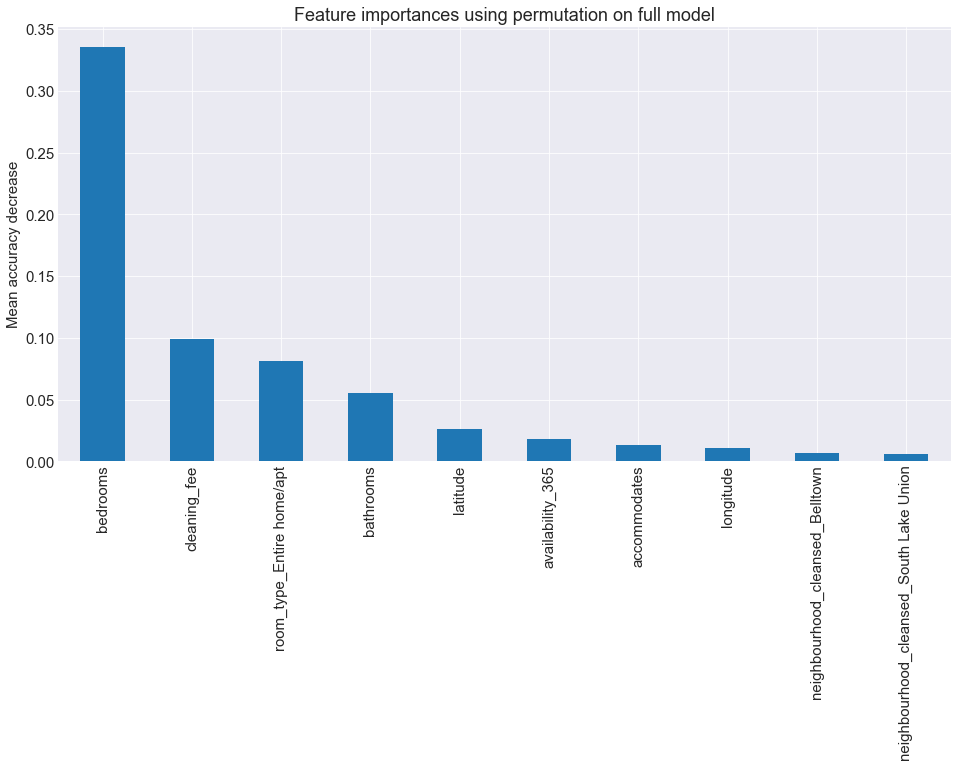

In [66]:
fig, ax = plt.subplots()
#forest_importances[:20].plot.bar(yerr=result.importances_std[:20], ax=ax)
forest_importances.sort_values(ascending=False)[:10].plot.bar(ax=ax, figsize=(16,8))
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
#fig.tight_layout()
plt.show()

### The most important features are: 
- Number of bedrooms
- cleaning fee
- room type
- Number of bathrooms
- location 
- availability

# 6. Deployment

The results in this notebook has been communicated through a Medium Blog:
https://medium.com/@ahmed.lotfy7/three-interesting-insights-from-seattle-city-airbnb-dataset-c9969c3d67f
    